In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings


from urllib.request import urlopen
from bs4 import BeautifulSoup as soup
from collections import Counter

warnings.filterwarnings(action='ignore')
plt.rcParams['font.family']='Gulim'

# 타고 홈페이지에서 인기차종(판매대수 데이터프레임 : pop_car_df)

인기차종의 판매량 :pop_car_df [Year,Car_name,판매량]

In [9]:
target="https://tago.kr/model/order.htm" # 차량 인기순위 파악 주소 
html = urlopen(target)
bs = soup(html.read(),'html.parser')

list_cars = bs.find_all('table')

j=0

pop_car_df=pd.DataFrame()

for list_car in list_cars:
    j=j+1
    for i in list_car.find_all('tr')[1:]:
        year = bs.find_all('h5',attrs={"class":"h5-tit"})
        year_num=(year[j-1].get_text()[0:4]) #year
        car_name=(i.find_all('td')[1].text) #차종
        amount=(i.find_all('td')[2].text) #판매량 
        pop_car_df = pd.concat([pop_car_df,pd.DataFrame({"Car_name":[car_name],"판매량":[amount],"Year":[year_num]})])
        
#year_nums.append(year[j-1].get_text()[0:4])#year
#car_names.append(i.find_all('td')[1].text) #차종
#amounts.append(i.find_all('td')[2].text) #판매량
        
       
pop_car_df=pop_car_df.reset_index()
pop_car_df = pop_car_df[['Year','Car_name','판매량']]# 데이터 프레임 열 순서 변경 

In [10]:
pop_car_df

,Year,Car_name,판매량
0,2022,현대 아이오닉5,"27,399"
1,2022,기아 EV6,"24,852"
2,2022,현대 포터2 일렉트릭,"20,272"
3,2022,기아 봉고3 EV,"12,719"
4,2022,현대 아이오닉6,"11,289"
5,2022,현대 넥쏘,"10,164"
6,2022,니로 EV,"7,454"
7,2022,테슬라 모델3,"7,323"
8,2022,테슬라 모델Y,"7,248"
9,2022,제네시스 GV60,"5,639"


# 지역별 차량 등록대수 area_cars 

area_cars[Year,시도명, 등록대수]

year_area_cars[시도명,2020년등록대수,2021년등록대수,2022년등록대수] 

In [11]:
temp1 = pd.read_csv("C:/work/자동차등록현황보고_이륜차신고현황 시도별 (2020).csv",encoding='EUC-KR')
temp2 = pd.read_csv("C:/work/자동차등록현황보고_이륜차신고현황 시도별 (2021).csv",encoding='EUC-KR')
temp3 = pd.read_csv("C:/work/자동차등록현황보고_이륜차신고현황 시도별 (2022).csv",encoding='EUC-KR')

#0번째 행에 인덱스가 값으로 들어가서 행 삭제 
temp1=temp1.drop([0]) 
temp2=temp2.drop([0])
temp3=temp3.drop([0])

area_cars = pd.concat([temp1,temp2,temp3])
area_cars=area_cars.loc[:,'월(Monthly)':'계'] # 월부터 계까지만 데이터 프레임에 저장 
area_cars=area_cars[area_cars['시군구'] =='계'] #시군구가 '계'인 항목만 데이터 프레임에 남김
area_cars=area_cars.reset_index() #수정된 데이터 프레임에 새로운 인덱스값 설정


area_cars=area_cars.drop(['index','시군구'],axis=1) #리셋된 area_cars에서 기존에 사용하던 index 와 시군구 행 삭제 

# 월 (Monthly) 행을 연도만 나오게 하겠음 
area_cars['date']=area_cars['월(Monthly)'].apply(lambda x : pd.to_datetime(str(x),format='%Y-%m'))
area_cars['Year']=area_cars['date'].dt.strftime('%Y')


area_cars=area_cars.drop(['월(Monthly)','date'],axis=1) # 월(Monthly)와 year 를 뽑아내기 위해 사용한 date 삭제 
area_cars = area_cars[['Year','시도명','계']]  # 데이터 프레임 열 순서 변경 
area_cars = area_cars.rename(columns={'계':'등록대수'}) # 데이터 명 변경 

In [12]:
area_cars

,Year,시도명,등록대수
0,2020,서울,459002
1,2020,부산,136158
2,2020,대구,137000
3,2020,인천,79420
4,2020,광주,40782
5,2020,대전,39242
6,2020,울산,64499
7,2020,세종,11667
8,2020,경기,417370
9,2020,강원,66937


In [13]:
#시각화 (그래프) 를 위한 데이터 프레임 입니다. 
year_area_cars=pd.DataFrame()

temp4 = temp1
temp5 = temp2
temp6 = temp3


temp4 = temp4.loc[:,'시도명':'계']
temp5 = temp5.loc[:,'시도명':'계']
temp6 = temp6.loc[:,'시도명':'계']

temp4=temp4[temp4['시군구'] =='계']
temp5=temp5[temp5['시군구'] =='계']
temp6=temp6[temp6['시군구'] =='계']

temp4=temp4.rename(columns={'계':'2020년 등록대수'})
temp5=temp5.rename(columns={'계':'2021년 등록대수'})
temp6=temp6.rename(columns={'계':'2022년 등록대수'})

temp4=temp4.reset_index()
temp5=temp5.reset_index()
temp6=temp6.reset_index()

temp4=temp4.drop(['index','시군구'],axis=1)
temp5=temp5.drop(['index','시군구','시도명'],axis=1)
temp6=temp6.drop(['index','시군구','시도명'],axis=1)

year_area_cars= pd.concat([temp4,temp5,temp6],axis=1)


In [14]:
year_area_cars

,시도명,2020년 등록대수,2021년 등록대수,2022년 등록대수
0,서울,459002,433020,420357
1,부산,136158,131423,133074
2,대구,137000,135919,120740
3,인천,79420,81029,81414
4,광주,40782,38473,36118
5,대전,39242,39691,40236
6,울산,64499,62533,63330
7,세종,11667,10695,11312
8,경기,417370,420200,427543
9,강원,66937,62487,62757


# 자동차 보조금 price_car_df, price_car.csv

price_car_df1 [광역시/도, 시/군/구, 차량가격,국고보조금,지방비보조금,보조금합계,예상구매가,차종,연도] | price_car.csv

price_car_df2 [광역시도,차량가격,국고보조금,지방비보조금,보조금합계,예상구매가,차종,연도] - NaN값 O | price_car2.csv

price_car_df3 [광역시도,차량가격,국고보조금,지방비보조금,보조금합계,예상구매가,차종,연도] - NaN값 X | price_car3.csv


# 인기차종의 보조금 
populat_df [차종, 광역시/도, 연도, 국고보조금,지방비보조금,보조금합계,예상구매가] | plpular.csv

selenium설치 

In [17]:
pip install selenium 

Note: you may need to restart the kernel to use updated packages.


In [18]:
price_info = "https://tago.kr/subsidy/index.htm" #보조금 url
html = urlopen(price_info)
bs = soup(html.read(),'html.parser')

In [19]:
from selenium import webdriver  #selenium의 webdriver을 사용하기 위한 import
from selenium.webdriver.common.keys import Keys #selenium으로 무엇인가 입력하기 위한 import
import time #페이지 로딩을 기다리는데 사용할 time 모듈


driver = webdriver.Chrome() #크롬 실행
driver.get(price_info) # 크롬에 '보조금 페이지'주소 넣고 실행

time.sleep(3)

In [20]:
#검색할 차량 명칭들 
temp = bs.find_all('span')[3] # 조건선택 조건들 전부 중에서 3번째가 모델명 option (전체)
temp1 = temp.find_all('option') #차종 구분

search_car_list =[]

for i in range(len(temp1)):
    search_car_list.append(temp1[i].text)

#검색할 연도 (24년 제외 )
temp2 = bs.find_all('span')[4] # 조건선택 조건들 전부 중에서 4번째가 연도 option (전체)
temp2=temp2.find_all('option')
years=[]

for i in range(len(temp2)):
    years.append(temp2[i].text)

years=years[0:4]


In [21]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as soup
import pandas as pd
from IPython.display import display
df=pd.DataFrame()

target = 'https://tago.kr/subsidy/'
html = urlopen(target)
bs = soup(html.read(), 'html.parser')
result = bs.select("#container > div.sub-container2 > div > div.right-wraper > div.table-style.line.scroll > table")[0]

try:
    result_df = pd.DataFrame()
    for i in search_car_list:
        for j in years:

            Year_elem = driver.find_element(By.XPATH,'//*[@id="frm"]/div/div[2]/span[2]/select')  
            Model_elem= driver.find_element(By.XPATH,'//*[@id="frm"]/div/div[2]/span[1]/select')
            button = driver.find_element(By.XPATH,'//*[@id="frm"]/div/div[2]/span[5]')

            driver.implicitly_wait(1)
            Year_elem.send_keys(j)
            driver.implicitly_wait(1)
            Model_elem.send_keys(i)
            button.click()
            
            for car in result.find_all('tr')[1:]:
                td_list = car.find_all('td')

                location = td_list[0].text
                location2 = td_list[1].text
                sales = td_list[2].text
                sup = td_list[4].text
                sup2 = td_list[5].text
                supsum = td_list[7].text
                expectation = td_list[8].text

                df = pd.concat([df,pd.DataFrame({'광역시/도':[location],"시/군/구":[location2],"차량가격":[sales],"국고보조금":[sup],"지방비보조금":[sup2],
                                             "보조금합계":[supsum],"예상구매가":[expectation],"차종":[i],"연도":[j]})])
            
except:
    pass

df

""


In [22]:
#위 코드의 결과로 데이터 프레임 price_car_df 추출 , to_csv로 데이터프레임 저장 
price_car_df = df
price_car_df.to_csv("price_car.csv")

In [28]:
price_car_df1 = pd.read_csv('price_car.csv')
price_car_df1

,Unnamed: 0,광역시/도,시/군/구,차량가격,국고보조금,지방비보조금,보조금합계,예상구매가,차종,연도
0,0,서울,서울특별시,"5,935",680,180,860,"5,075",기아 EV6 (Kia EV6),2020
1,0,부산,부산광역시,"5,935",680,300,980,"4,955",기아 EV6 (Kia EV6),2020
2,0,대구,대구광역시,"5,935",680,350,"1,030","4,905",기아 EV6 (Kia EV6),2020
3,0,인천,인천광역시,"5,935",680,350,"1,030","4,905",기아 EV6 (Kia EV6),2020
4,0,광주,광주광역시,"5,935",680,390,"1,070","4,865",기아 EV6 (Kia EV6),2020
...,...,...,...,...,...,...,...,...,...,...
48595,0,경남,산청군,"5,935",680,600,"1,280","4,655",현대 카운티 일렉트릭 (County Electric),2023
48596,0,경남,함양군,"5,935",680,600,"1,280","4,655",현대 카운티 일렉트릭 (County Electric),2023
48597,0,경남,거창군,"5,935",680,"1,150","1,830","4,105",현대 카운티 일렉트릭 (County Electric),2023
48598,0,경남,합천군,"5,935",680,800,"1,480","4,455",현대 카운티 일렉트릭 (County Electric),2023


In [25]:
price_car_df2 = pd.read_csv('price_car2.csv')
price_car_df2

,광역시/도,차량가격,국고보조금,지방비보조금,보조금합계,예상구매가,차종,연도
0,서울,"5,935",680.0,180,860,"5,075",기아 EV6 (Kia EV6),2020.0
1,부산,"5,935",680.0,300,980,"4,955",기아 EV6 (Kia EV6),2020.0
2,대구,"5,935",680.0,350,"1,030","4,905",기아 EV6 (Kia EV6),2020.0
3,인천,"5,935",680.0,350,"1,030","4,905",기아 EV6 (Kia EV6),2020.0
4,광주,"5,935",680.0,390,"1,070","4,865",기아 EV6 (Kia EV6),2020.0
...,...,...,...,...,...,...,...,...
65530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
price_car_df3 = pd.read_csv('price_car3.csv')
price_car_df3

,광역시/도,차량가격,국고보조금,지방비보조금,보조금합계,예상구매가,차종,연도
0,서울,"5,935",680,180,860,5075,기아 EV6 (Kia EV6),2020
1,부산,"5,935",680,300,980,4955,기아 EV6 (Kia EV6),2020
2,대구,"5,935",680,350,1030,4905,기아 EV6 (Kia EV6),2020
3,인천,"5,935",680,350,1030,4905,기아 EV6 (Kia EV6),2020
4,광주,"5,935",680,390,1070,4865,기아 EV6 (Kia EV6),2020
...,...,...,...,...,...,...,...,...
48295,경남,"5,935",680,600,1280,4655,현대 카운티 일렉트릭 (County Electric),2023
48296,경남,"5,935",680,600,1280,4655,현대 카운티 일렉트릭 (County Electric),2023
48297,경남,"5,935",680,600,1280,4655,현대 카운티 일렉트릭 (County Electric),2023
48298,경남,"5,935",680,1150,1830,4105,현대 카운티 일렉트릭 (County Electric),2023


In [102]:
price_car_df4 = pd.read_csv('price_car4.csv')
price_car_df4

,차종,광역시/도,연도,국고보조금,지방비보조금,보조금합계,예상구매가
0,EVKMC 마사다 2밴 (EVKMC Masada 2 van),강원,2020,680.0,360.0,1040.0,4895.0
1,EVKMC 마사다 2밴 (EVKMC Masada 2 van),강원,2021,680.0,360.0,1040.0,4895.0
2,EVKMC 마사다 2밴 (EVKMC Masada 2 van),강원,2022,680.0,360.0,1040.0,4895.0
3,EVKMC 마사다 2밴 (EVKMC Masada 2 van),강원,2023,680.0,360.0,1040.0,4895.0
4,EVKMC 마사다 2밴 (EVKMC Masada 2 van),경기,2020,680.0,367.7,1047.7,4887.3
...,...,...,...,...,...,...,...
5095,현대 포터2 일렉트릭 (Porter II Electric),충남,2023,680.0,700.0,1380.0,4555.0
5096,현대 포터2 일렉트릭 (Porter II Electric),충북,2020,680.0,680.0,1360.0,4575.0
5097,현대 포터2 일렉트릭 (Porter II Electric),충북,2021,680.0,680.0,1360.0,4575.0
5098,현대 포터2 일렉트릭 (Porter II Electric),충북,2022,680.0,680.0,1360.0,4575.0


In [27]:
popular_df = pd.read_csv('popular.csv') #인기차종의 보조금 
popular_df

,차종,광역시/도,연도,국고보조금,지방비보조금,보조금합계,예상구매가
0,EVKMC 마사다 2밴 (EVKMC Masada 2 van),강원,2020,680.0,360.0,1040.0,4895.0
1,EVKMC 마사다 2밴 (EVKMC Masada 2 van),강원,2021,680.0,360.0,1040.0,4895.0
2,EVKMC 마사다 2밴 (EVKMC Masada 2 van),강원,2022,680.0,360.0,1040.0,4895.0
3,EVKMC 마사다 2밴 (EVKMC Masada 2 van),강원,2023,680.0,360.0,1040.0,4895.0
4,EVKMC 마사다 2밴 (EVKMC Masada 2 van),경기,2020,680.0,367.7,1047.7,4887.3
...,...,...,...,...,...,...,...
5095,현대 포터2 일렉트릭 (Porter II Electric),충남,2023,680.0,700.0,1380.0,4555.0
5096,현대 포터2 일렉트릭 (Porter II Electric),충북,2020,680.0,680.0,1360.0,4575.0
5097,현대 포터2 일렉트릭 (Porter II Electric),충북,2021,680.0,680.0,1360.0,4575.0
5098,현대 포터2 일렉트릭 (Porter II Electric),충북,2022,680.0,680.0,1360.0,4575.0


# 전국차량 충전기 현황 carge_df , charge_num.csv

charge_df [location,급속충전기(대),완속충전기(대)] | charge_num.csv

In [62]:
#전국 차량 충전기 현황 
charge_df = pd.read_csv('charge_num.csv') 
charge_df

,location,급속충전기(대),완속충전기(대)
0,강원도,259,209
1,경기도,862,1395
2,경상남도,450,382
3,경상북도,443,244
4,광주광역시,120,132
5,대구광역시,259,402
6,대전광역시,170,182
7,부산광역시,205,211
8,서울특별시,581,946
9,세종특별자치시,87,133


## 데이터 프레임 목록

인기차종의 판매량 :pop_car_df [Year,Car_name,판매량]

지역별 차량 등록대수 

area_cars[Year,시도명, 등록대수]

year_area_cars[시도명,2020년등록대수,2021년등록대수,2022년등록대수] 

자동차 보조금

price_car_df1 [광역시/도, 시/군/구, 차량가격,국고보조금,지방비보조금,보조금합계,예상구매가,차종,연도] | price_car.csv

price_car_df2 [광역시도,차량가격,국고보조금,지방비보조금,보조금합계,예상구매가,차종,연도] - NaN값 O | price_car2.csv

price_car_df3 [광역시도,차량가격,국고보조금,지방비보조금,보조금합계,예상구매가,차종,연도] - NaN값 X | price_car3.csv

인기차종의 보조금 

populat_df [차종, 광역시/도, 연도, 국고보조금,지방비보조금,보조금합계,예상구매가] | plpular.csv


전국차량충전기 현황

charge_df [location,급속충전기(대),완속충전기(대)] | charge_num.csv

## 시각화





## 지역별 충전소 그래프 

아나콘다 프롬프트에서 
pip install geopandas 해주셔야 아래 geopandas 가 import 됩니다.

In [49]:
import geopandas as gpd 

In [86]:
plt.rcParams['axes.unicode_minus'] = False       # 마이너스 부호 깨짐 현상 

kr_sido = gpd.read_file("C:/work/TL_SCCO_CTPRVN", encoding="cp949") ## 원본 shape 파일의 한글코드: cp949 (not utf8)
kr_sido.rename(columns={"CTP_KOR_NM":"location"},inplace=True)
kr_sido.drop(columns={"CTPRVN_CD","CTP_ENG_NM"},inplace=True)
kr_sido=kr_sido.merge(charge_df,on='location')

In [65]:
#전국 충전기 그래프를 위한 데이터프레임 입니다. 
kr_sido

,location,geometry,급속충전기(대),완속충전기(대)
0,서울특별시,"POLYGON ((966987.226 1941110.946, 961574.146 1...",581,946
1,부산광역시,"MULTIPOLYGON (((1138209.365 1673609.179, 11381...",205,211
2,대구광역시,"POLYGON ((1107819.047 1781088.551, 1112278.678...",259,402
3,인천광역시,"MULTIPOLYGON (((909743.413 1946023.117, 909736...",202,301
4,광주광역시,"POLYGON ((932712.687 1696168.692, 935873.826 1...",120,132
5,대전광역시,"POLYGON ((990703.983 1832673.400, 990974.727 1...",170,182
6,울산광역시,"MULTIPOLYGON (((1167949.952 1710285.043, 11679...",72,67
7,세종특별자치시,"POLYGON ((971235.936 1844386.985, 969224.585 1...",87,133
8,경기도,"MULTIPOLYGON (((931607.470 1894480.382, 931653...",862,1395
9,강원도,"MULTIPOLYGON (((1165648.417 1909008.805, 11656...",259,209


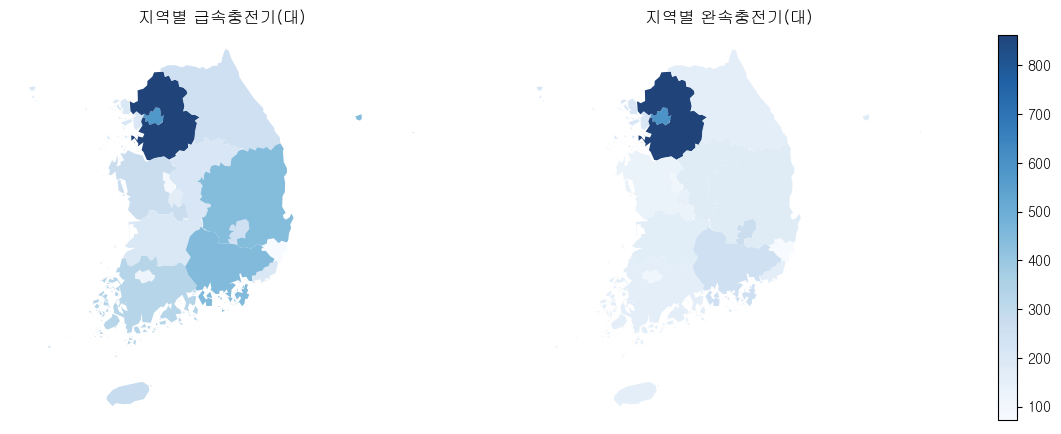

In [85]:
fig,ax = plt.subplots(ncols=2,sharey=True,figsize=(15,10))

kr_sido.plot(ax=ax[0],column="급속충전기(대)",cmap="Blues",legend=False, alpha=0.9)
kr_sido.plot(ax=ax[1],column="완속충전기(대)",cmap="Blues",legend=False, alpha=0.9)

ax[0].set_title('지역별 급속충전기(대)')
ax[1].set_title('지역별 완속충전기(대)')

patch_col = ax[0].collections[0]
cb = fig.colorbar(patch_col, ax=ax, shrink=0.5)

ax[0].set_axis_off();
ax[1].set_axis_off();

## 지역별 차량 등록대수 그래프 

In [95]:

kr_sido_2 = gpd.read_file("C:/work/TL_SCCO_CTPRVN", encoding="cp949") ## 원본 shape 파일의 한글코드: cp949 (not utf8)
kr_sido_2.rename(columns={"CTP_KOR_NM":"location"},inplace=True)
kr_sido_2.drop(columns={"CTPRVN_CD","CTP_ENG_NM"},inplace=True)
kr_sido_2=pd.concat([kr_sido_2,year_area_cars],axis=1)
kr_sido_2.drop(columns={"시도명"},inplace=True)
kr_sido_2

,location,geometry,2020년 등록대수,2021년 등록대수,2022년 등록대수
0,서울특별시,"POLYGON ((966987.226 1941110.946, 961574.146 1...",459002,433020,420357
1,부산광역시,"MULTIPOLYGON (((1138209.365 1673609.179, 11381...",136158,131423,133074
2,대구광역시,"POLYGON ((1107819.047 1781088.551, 1112278.678...",137000,135919,120740
3,인천광역시,"MULTIPOLYGON (((909743.413 1946023.117, 909736...",79420,81029,81414
4,광주광역시,"POLYGON ((932712.687 1696168.692, 935873.826 1...",40782,38473,36118
5,대전광역시,"POLYGON ((990703.983 1832673.400, 990974.727 1...",39242,39691,40236
6,울산광역시,"MULTIPOLYGON (((1167949.952 1710285.043, 11679...",64499,62533,63330
7,세종특별자치시,"POLYGON ((971235.936 1844386.985, 969224.585 1...",11667,10695,11312
8,경기도,"MULTIPOLYGON (((931607.470 1894480.382, 931653...",417370,420200,427543
9,강원도,"MULTIPOLYGON (((1165648.417 1909008.805, 11656...",66937,62487,62757


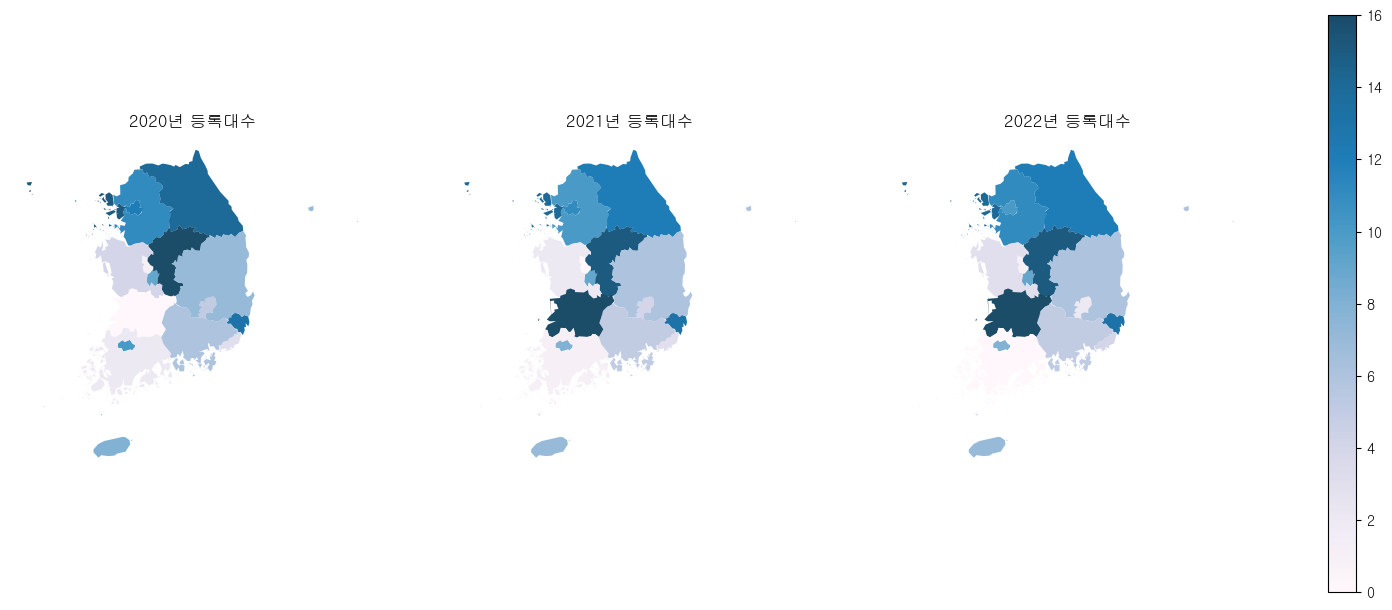

In [100]:
fig,ax = plt.subplots(ncols=3,sharey=True,figsize=(20,15))

kr_sido_2.plot(ax=ax[0],column="2020년 등록대수",cmap="PuBu",legend=False, alpha=0.9)
kr_sido_2.plot(ax=ax[1],column="2021년 등록대수",cmap="PuBu",legend=False, alpha=0.9)
kr_sido_2.plot(ax=ax[2],column="2022년 등록대수",cmap="PuBu",legend=False, alpha=0.9)

ax[0].set_title('2020년 등록대수')
ax[1].set_title('2021년 등록대수')
ax[2].set_title('2022년 등록대수')

patch_col = ax[0].collections[0]
cb = fig.colorbar(patch_col, ax=ax, shrink=0.5)

ax[0].set_axis_off();
ax[1].set_axis_off();
ax[2].set_axis_off();